<a href="https://colab.research.google.com/github/Mou3098/Testing/blob/main/task2_GRIP_Sept_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The spark foundation
##Data Science and Business Analyst
##Task2

Import all the libraries

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from numpy import unique
from numpy import where
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans

Reading the dataset 

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/mrgautambhagat/datasets/main/Iris.csv')

In [ ]:
print(df.head(5))

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


Information about dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Describe the Dataset

In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


See how many unique value in each feature

In [ ]:
df.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

ID no have no effect on classification

In [ ]:
df=df.drop(['Id'],axis = 1)

In [ ]:
x = df.iloc[:, [0, 1, 2, 3]].values

In [ ]:


df['Species'].unique()



array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
df.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

Visualize the dataset

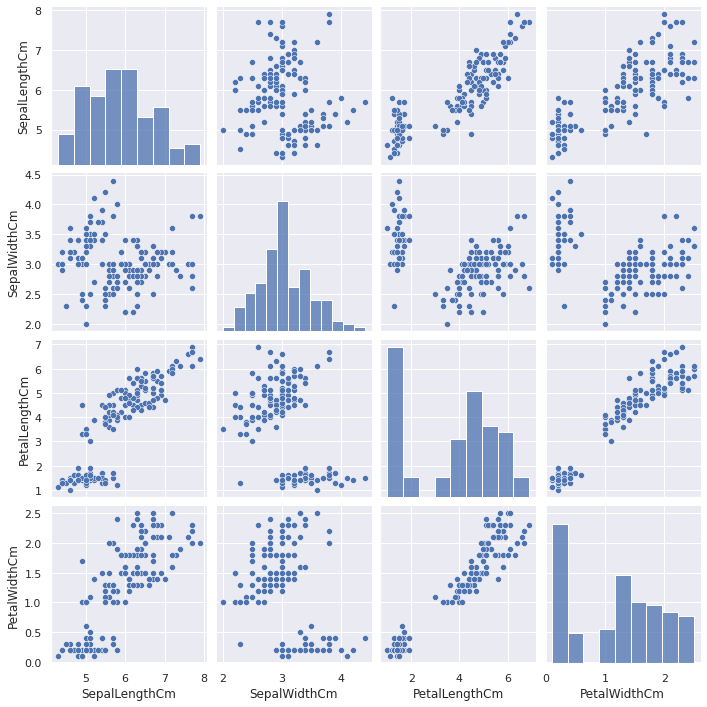

In [ ]:
sns.pairplot(df)

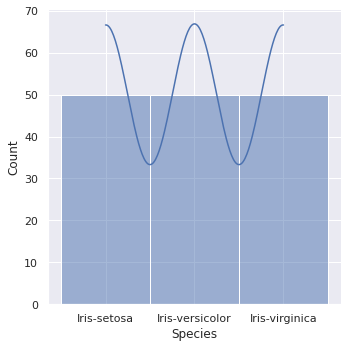

In [ ]:
sns.displot(df['Species'],kde=True)

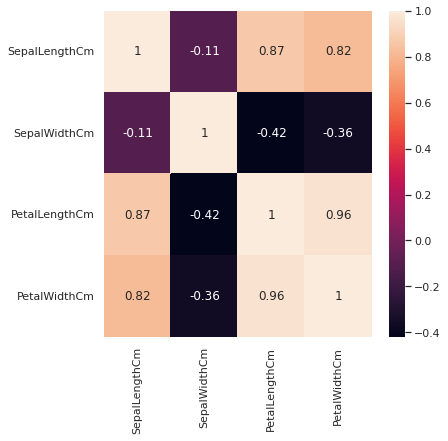

In [ ]:
sns.set(rc = {'figure.figsize':(6,6)})
sns.heatmap(df.corr(),annot=True)

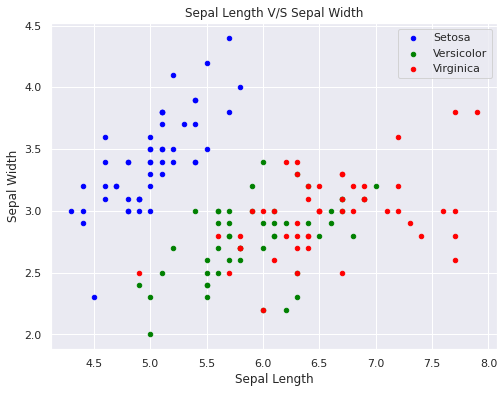

In [ ]:
fig = df[df.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue',label="Setosa")
df[df.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green',label="Versicolor",ax=fig)
df[df.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='red',label="Virginica",ax=fig)
fig.set_xlabel('Sepal Length')
fig.set_ylabel('Sepal Width')
fig.set_title('Sepal Length V/S Sepal Width')
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

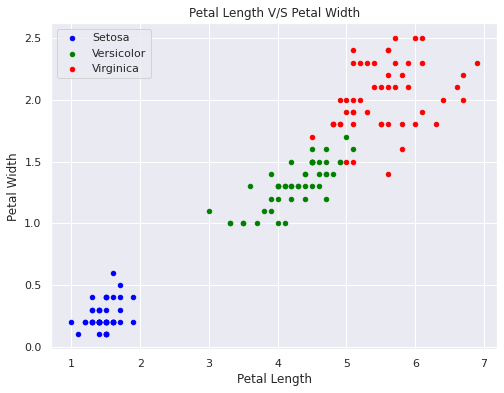

In [ ]:
fig = df[df.Species=='Iris-setosa'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='blue',label="Setosa")
df[df.Species=='Iris-versicolor'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='green',label="Versicolor",ax=fig)
df[df.Species=='Iris-virginica'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='red',label="Virginica",ax=fig)
fig.set_xlabel('Petal Length')
fig.set_ylabel('Petal Width')
fig.set_title('Petal Length V/S Petal Width')
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

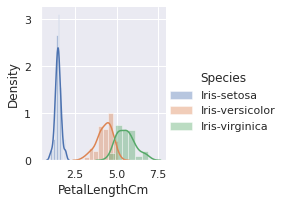

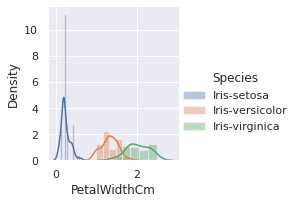

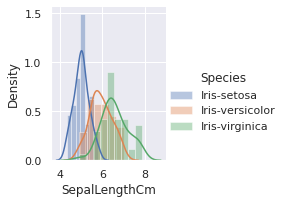

In [ ]:
sns.FacetGrid(df,hue="Species",height=3).map(sns.distplot,"PetalLengthCm").add_legend()
sns.FacetGrid(df,hue="Species",height=3).map(sns.distplot,"PetalWidthCm").add_legend()
sns.FacetGrid(df,hue="Species",height=3).map(sns.distplot,"SepalLengthCm").add_legend()
plt.show()

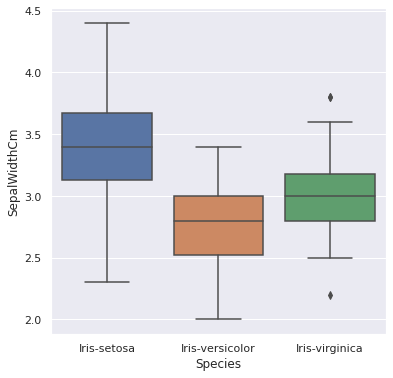

In [ ]:
sns.boxplot(x="Species",y="SepalWidthCm",data=df)
plt.show()

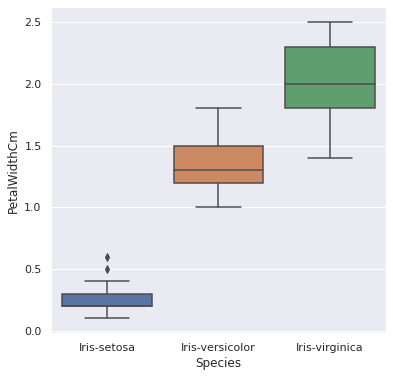

In [ ]:
sns.boxplot(x="Species",y="PetalWidthCm",data=df)
plt.show()

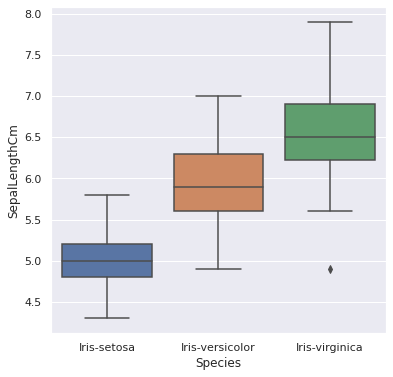

In [ ]:
sns.boxplot(x="Species",y="SepalLengthCm",data=df)
plt.show()

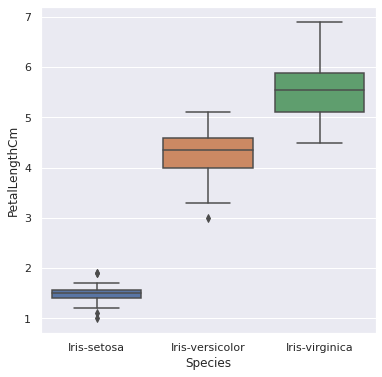

In [ ]:
sns.boxplot(x="Species",y="PetalLengthCm",data=df)
plt.show()

Elbow method

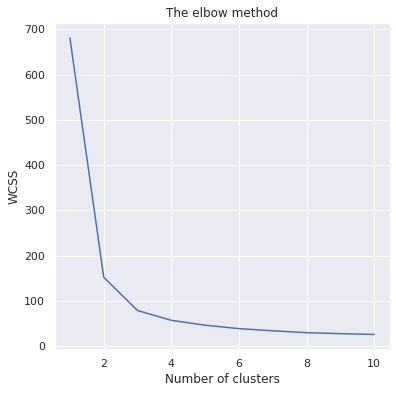

In [ ]:
wcss = []   #within-cluster sum-of-squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 'the elbow

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [ ]:
# get all of the unique clusters
K_clusters = unique(y_kmeans)
K_clusters

array([0, 1, 2], dtype=int32)

Show clustering result in 2D plane

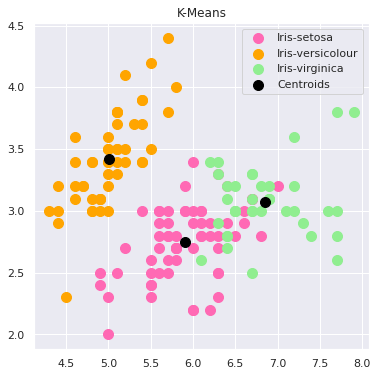

In [ ]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'hotpink', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 100, c = 'lightgreen', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')
plt.title("K-Means")
plt.legend()
plt.show()

Show clustering result in 3D plane

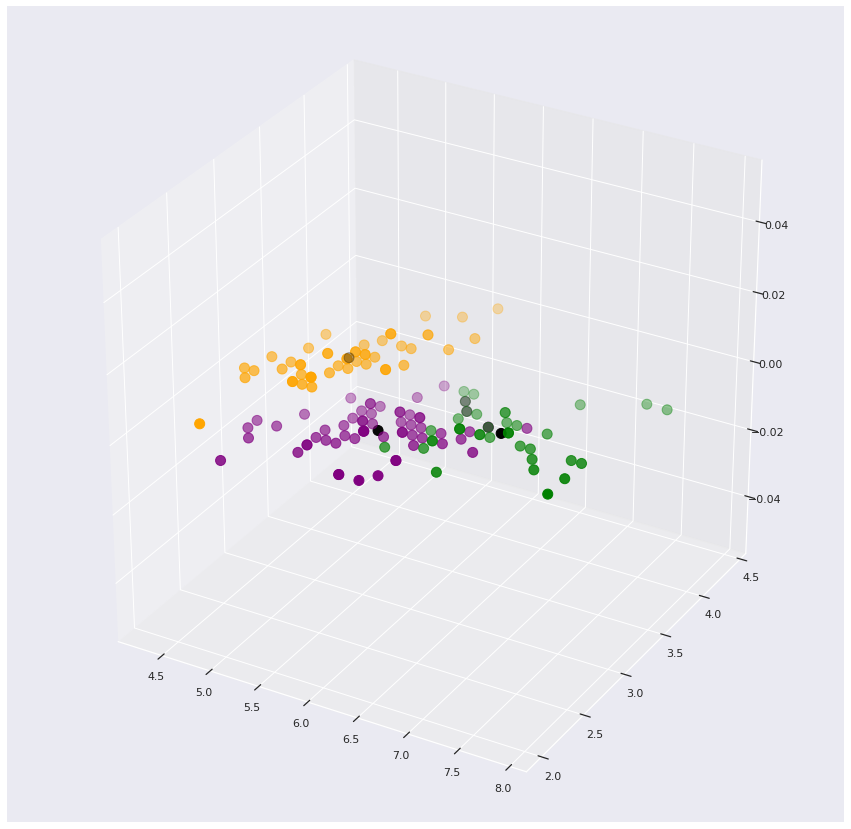

In [ ]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')
plt.show()